In [107]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

 The analysis After observing the dataset and suggested questions we will  keep only relevent data remove the useless data
so  we can make our calculation logical

In [108]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#Result of  the data set Obsevations : 
1.) ALL movies are American  so dollar  will be default unit of currency 

2.) voting not mentioned based on critics or normal People

Data Cleaning (Removing the useless  )
According to  observation :

We need to remove unused column such as:
      1- id, imdb_id, vote_count, production_company, keywords, homepage etc.
      2-Removing the duplicated in the rows(if any).
      3-Some movies in the database have zero budget or zero revenue, 
        #that is there value has not been recorded so we will be discarding such entries
            #Changing release date column into date format.
      4-Replacing 0 by NAN in runtime column.
      5-Changing format of budget and revenue column.
1. Removing Unused columns

Columns that we need to delete are - id, imdb_id, popularity, budget_adj,
revenue_adj, homepage, keywords, overview, production_companies, 
vote_count and vote_average.

In [109]:
# Let us check infomation on datatypes of columns and missing values.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [110]:
#creating a list of column to be removed
rem_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
tmdb_data= tmdb_data.drop(rem_col,1)

#previewing the new dataset
tmdb_data.head()


C:\Users\a84080366\AppData\Local\Temp\ipykernel_2332\3106197292.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmdb_data= tmdb_data.drop(rem_col,1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [111]:
rows, col = tmdb_data.shape
#avoid header row then show before removing repeated rows.
print('we had {} n.o of movies with {} columns in it.'.format(rows-1, col))

we had 10865 n.o of movies with 10 columns in it.


In [112]:
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

print('after remove repeated we had {}  movies with {} columns in it.'.format(rows-1, col))

after remove repeated we had 10864  movies with 10 columns in it.


So one movie was repeted and removed

In [113]:
#3-Some movies in the database have zero budget or zero revenue, 
        #that is there value has not been recorded so we will be discarding such entries
            #Changing release date column into date format.
short_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[short_list] = tmdb_data[short_list].replace(0, np.NAN)

#Removing all the row which has NaN value in short_list 
tmdb_data.dropna(subset = short_list, inplace = True)

rows, col = tmdb_data.shape
print('New short list had {} no.of movies.'.format(rows-1))




New short list had 3853 no.of movies.


In [114]:
#Changing release date column into date format.
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [115]:
# check dataset after changing to standard
tmdb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [116]:
#4-Replacing 0 by NAN in runtime column.
#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

In [117]:
# check dataset after changing 
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [118]:
# Let us check infomation on datatypes of columns and missing values.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3853 non-null   object        
 5   tagline         3574 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 331.2+ KB


In [119]:
# Columns that need to be checked.
columns = ['budget', 'revenue']
# Replace 0 with NAN
tmdb_data[columns] = tmdb_data[columns].replace(0, np.NaN)
# Drop rows which contains NAN
tmdb_data.dropna(subset = columns, inplace = True)
rows, col = tmdb_data.shape
print('We now have only {} rows.'.format(rows-1))

We now have only 3853 rows.


In [120]:
# Let us check infomation on datatypes of columns and missing values.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3853 non-null   object        
 5   tagline         3574 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 331.2+ KB


In [121]:
#5-Changing format of budget and revenue column.
new_type=['budget', 'revenue']
#changing data type
tmdb_data[new_type]=tmdb_data[new_type].applymap(np.int64)
#printing the new changed information
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [122]:
#Exploratory Data Analysis
# The profit  Calculating of the each movie
#profit=Revenue-Budget
#insert function with three parameters:
#(index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2,'the profit',tmdb_data['revenue']-tmdb_data['budget'])

#check the dataset changes 
tmdb_data.head()

,budget,revenue,the profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [123]:
# Movie had largest profit
tmdb_data.loc[tmdb_data['the profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
the profit                                               2544505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
Name: 1386, dtype: object

In [124]:
# Movie had smallest profit
tmdb_data.loc[tmdb_data['the profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
the profit                                               -413912431
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
Name: 2244, dtype: object

In [125]:
#so:
#largest profit :: Avatar with profit of 2544505847 $

#smallest profit:: The Warrior's Way with profit of -413912431 $

In [126]:
# Movie with largest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
the profit                                                -17128721
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
tagline                              The man who hijacked the world
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
Name: 2107, dtype: object

In [168]:
# Movie with smallest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
the profit                                                       -5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                        Shinichiro Watanabe
tagline                                                         NaN
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
Name: 5162, dtype: object

In [191]:
# Average runtime of movies
tmdb_data['runtime'].mean()

109.22029060716139

So the average runtime of the movies is 109.22 minutesb

#Visualization:

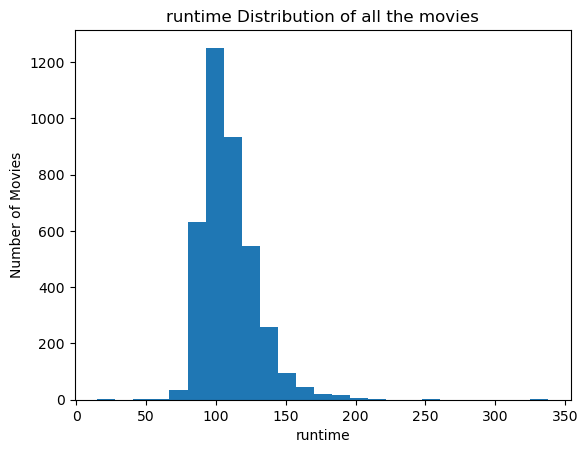

In [192]:
#function will take coloumn name as x-axis &  draw histrogram of it's distribution on the all movies
def draw(x):
    figure=plt.hist(tmdb_data[x], bins = 25)
    # x-axis
    plt.xlabel(x)
    # y-axis
    plt.ylabel('Number of Movies')
    # Title of the histogram
    plt.title(x +' '+'Distribution of all the movies')
    return figure 
explore=draw('runtime')
    

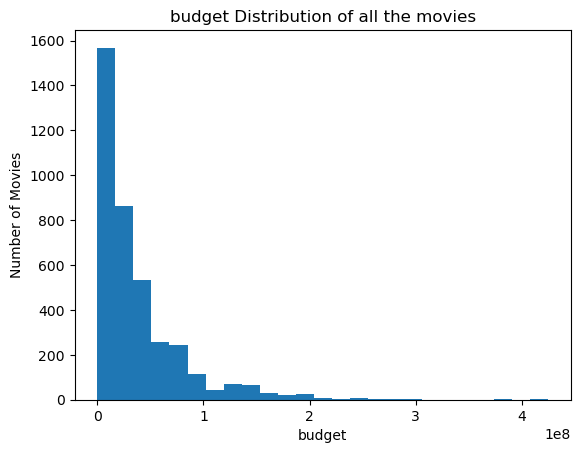

In [193]:
explore=draw('budget')

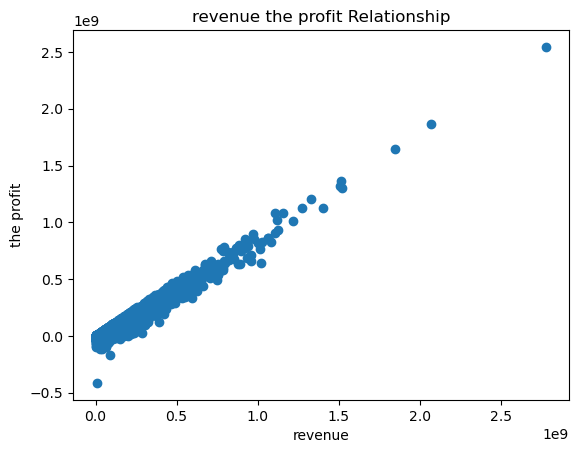

In [200]:
#function will take coloumn name as x-axis & y-axis  draw SCATTER of their relationship
def relation(i,o):
    fig=plt.scatter(tmdb_data[i], tmdb_data[o], alpha=1)
  
    # x-axis
    plt.xlabel(i)
    # y-axis
    plt.ylabel(o)
    # Title of the histogram
    plt.title(i +' ' +o+' Relationship')
    return fig 
relationship=relation('revenue','the profit')

In [ ]:
#Relationsip between budget VS The profit

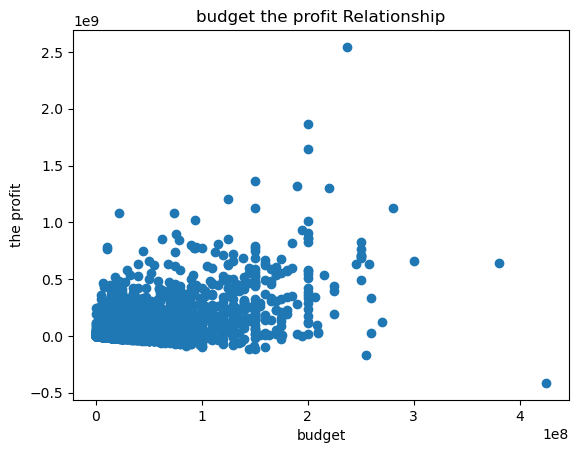

In [201]:
relationship=relation('budget','the profit')

In [103]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
genres_count = pd.Series(tmdb_data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

In [104]:
#average runtime of movies
tmdb_data['runtime'].mean()

109.22029060716139

In [105]:
# Finfd the average budget of movies which made profit more then 25M Dollars
tmdb_data['budget'].mean()

37203696.954852104

In [106]:
#This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(tmdb_data['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Tom Hanks             34
Sylvester Stallone    34
Brad Pitt             34
Tom Cruise            33
Denzel Washington     32
Eddie Murphy          32
Liam Neeson           31
Owen Wilson           30
Julianne Moore        30
Mark Wahlberg         29
Willem Dafoe          29
Robin Williams        29
dtype: int64

#Conclusions
 After this analysis we can conclude following:

#Successful criteria For a Movie to be in :

1-Average Budget must be around 51870307 millon dollar
2-Average duration of the movie must be 112.56 minutes
3-Any one of these should be in the cast :Robert De Niro, Bruce Willis , Nicolas Cage, Matt Damon 
4-Genre must be : Action, Adventure, Thriller, Comedy, Drama.